<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/code/%EB%B0%94%EC%9D%B4%EB%84%88%EB%A6%AC%EC%9D%B8%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/결측치완료.csv',encoding='cp949')
data

,시설용량,물리적,생물학적,고도,유입하수량,물리적 유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,물리적 방류량,...,적용신기술,중심처리시설,운영주체,명칭,지역구분,세부단위 구역,지류,수계,준공일_day,가동개시일_day
0,860000,0,0,860000,557225.3,0,0.0,557225.3,561135.4,0,...,0,0,자체,한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12238,12238
1,1590000,0,100000,1490000,1263583.9,0,126961.3,1136622.6,1284644.9,0,...,0,0,자체,한강서울,500톤 이상(Ⅲ지역),한강본류,중랑천,한강,16172,16172
2,1630000,0,120000,1510000,1607080.8,0,150526.6,1456554.2,1607080.8,0,...,0,0,민간(대행),한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12238,12359
3,900000,0,0,900000,752384.9,0,0.0,752384.9,752384.9,0,...,0,0,민간(대행),한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12076,12076
4,120000,0,0,120000,51697.2,0,0.0,51697.2,52037.6,0,...,0,0,공기업,낙동강남해,500톤 이상(Ⅳ지역),남해동부,낙동강,낙동강,5479,5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,0,30,25.5,0,0.0,25.5,25.5,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,5847,5847
4276,30,0,0,30,11.1,0,0.0,11.1,11.1,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,5524,5524
4277,25,0,0,25,6.2,0,0.0,6.2,6.2,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,6095,6095
4278,23,0,0,23,7.9,0,0.0,7.9,7.9,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,7988,7988


In [ ]:
df = data.copy()

In [ ]:
df

,시설용량,물리적,생물학적,고도,유입하수량,물리적 유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,물리적 방류량,...,적용신기술,중심처리시설,운영주체,명칭,지역구분,세부단위 구역,지류,수계,준공일_day,가동개시일_day
0,860000,0,0,860000,557225.3,0,0.0,557225.3,561135.4,0,...,0,0,자체,한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12238,12238
1,1590000,0,100000,1490000,1263583.9,0,126961.3,1136622.6,1284644.9,0,...,0,0,자체,한강서울,500톤 이상(Ⅲ지역),한강본류,중랑천,한강,16172,16172
2,1630000,0,120000,1510000,1607080.8,0,150526.6,1456554.2,1607080.8,0,...,0,0,민간(대행),한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12238,12359
3,900000,0,0,900000,752384.9,0,0.0,752384.9,752384.9,0,...,0,0,민간(대행),한강서울,500톤 이상(Ⅲ지역),한강본류,한강,한강,12076,12076
4,120000,0,0,120000,51697.2,0,0.0,51697.2,52037.6,0,...,0,0,공기업,낙동강남해,500톤 이상(Ⅳ지역),남해동부,낙동강,낙동강,5479,5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,0,30,25.5,0,0.0,25.5,25.5,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,5847,5847
4276,30,0,0,30,11.1,0,0.0,11.1,11.1,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,5524,5524
4277,25,0,0,25,6.2,0,0.0,6.2,6.2,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,6095,6095
4278,23,0,0,23,7.9,0,0.0,7.9,7.9,0,...,0,0,민간(대행),영산강하류,50톤 미만,영산강하류,영산강,영산강,7988,7988


# **바이너리 인코딩**

In [ ]:
df = df.drop([ '물리적', '물리적 유입하수량', '물리적 방류량' ], axis=1)

In [ ]:
df = df.drop(['구군','시설명','소재지','처리방법','적용신기술','중심처리시설','명칭','세부단위 구역','지류'],axis=1)

In [ ]:
df

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,하수처리량당 (CO2)배출량,위탁비용,직원총수(명),안전사고건수,시도,운영주체,지역구분,수계,준공일_day,가동개시일_day
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0.144,0.0,0,1,서울특별시,자체,500톤 이상(Ⅲ지역),한강,12238,12238
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0.168,0.0,0,0,서울특별시,자체,500톤 이상(Ⅲ지역),한강,16172,16172
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,0.147,79861.0,175,0,서울특별시,민간(대행),500톤 이상(Ⅲ지역),한강,12238,12359
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,0.131,55789.3,133,1,서울특별시,민간(대행),500톤 이상(Ⅲ지역),한강,12076,12076
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0.192,4983.6,23,0,부산광역시,공기업,500톤 이상(Ⅳ지역),낙동강,5479,5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,0.063,0.0,0,0,제주특별자치도,민간(대행),50톤 미만,영산강,5847,5847
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,0.386,0.0,0,0,제주특별자치도,민간(대행),50톤 미만,영산강,5524,5524
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,0.485,0.0,0,0,제주특별자치도,민간(대행),50톤 미만,영산강,6095,6095
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,0.806,0.0,0,0,제주특별자치도,민간(대행),50톤 미만,영산강,7988,7988


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시설용량             4280 non-null   int64  
 1   생물학적             4280 non-null   int64  
 2   고도               4280 non-null   int64  
 3   유입하수량            4280 non-null   float64
 4   생물학적 유입하수량       4280 non-null   float64
 5   고도 유입하수량         4280 non-null   float64
 6   방류량              4280 non-null   float64
 7   생물학적 방류량         4280 non-null   float64
 8   고도 방류량           4280 non-null   float64
 9   유입 BOD           4280 non-null   float64
 10  방류 BOD           4280 non-null   float64
 11  유입 COD           4280 non-null   float64
 12  방류 COD           4280 non-null   float64
 13  유입 SS            4280 non-null   float64
 14  방류 SS            4280 non-null   float64
 15  유입 T-N           4280 non-null   float64
 16  방류 T-N           4280 non-null   float64
 17  유입 T-P        

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 6.6 MB/s 


In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
y = df['처리효율']
X = df.drop(['처리효율'], axis=1)

enc = BinaryEncoder(cols =['목표수질(BOD)','시도','운영주체','지역구분','수계']).fit(X,y)
numeric_dataset = enc.transform(X)

In [ ]:
# 목표수질(BOD),시도,운영주체,지역구분,수계

In [ ]:
numeric_dataset

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,운영주체_0,운영주체_1,지역구분_0,지역구분_1,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,1,0,0,1,0,0,1,12238,12238
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,1,0,0,1,0,0,1,16172,16172
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,1,0,0,0,1,0,0,1,12238,12359
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,1,0,0,0,1,0,0,1,12076,12076
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,1,1,0,1,0,0,1,0,5479,5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,1,0,1,0,1,0,1,1,5847,5847
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,1,0,1,0,1,0,1,1,5524,5524
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,1,0,1,0,1,0,1,1,6095,6095
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,1,0,1,0,1,0,1,1,7988,7988


In [ ]:
numeric_dataset.to_csv('바이너리인코딩.csv',encoding="utf-8-sig")

In [ ]:
numeric_dataset = numeric_dataset.drop(['방류수 소독방법'], axis=1)

In [ ]:
numeric_dataset

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,운영주체_0,운영주체_1,지역구분_0,지역구분_1,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,1,0,0,1,0,0,1,12238,12238
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,1,0,0,1,0,0,1,16172,16172
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,1,0,0,0,1,0,0,1,12238,12359
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,1,0,0,0,1,0,0,1,12076,12076
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,1,1,0,1,0,0,1,0,5479,5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,1,0,1,0,1,0,1,1,5847,5847
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,1,0,1,0,1,0,1,1,5524,5524
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,1,0,1,0,1,0,1,1,6095,6095
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,1,0,1,0,1,0,1,1,7988,7988


In [ ]:
col_disinfect=numeric_dataset['방류수 소독방법'].copy()

In [ ]:
col_disinfect

0                염소 
1             염소 오존 
2                염소 
3              염소 기타
4               자외선 
            ...     
4275    염소 자외선 오존 기타
4276    염소 자외선 오존 기타
4277    염소 자외선 오존 기타
4278    염소 자외선 오존 기타
4279    염소 자외선 오존 기타
Name: 방류수 소독방법, Length: 4280, dtype: object

In [ ]:
for i in range(len(col_disinfect)):
  col_disinfect[i]=str(col_disinfect[i])

In [ ]:
arr1 = [] #염소
arr2 = [] #자외선
arr3 = [] #오존
arr4 = [] #기타

In [ ]:
if '염소' in col_disinfect[i]:
  

있다


In [ ]:
for i in range(len(col_disinfect)):
  if '염소' in col_disinfect[i]:
    arr1.append(1)
  else:
    arr1.append(0)

In [ ]:
for i in range(len(col_disinfect)):
  if '자외선' in col_disinfect[i]:
    arr2.append(1)
  else:
    arr2.append(0)

In [ ]:
for i in range(len(col_disinfect)):
  if '오존' in col_disinfect[i]:
    arr3.append(1)
  else:
    arr3.append(0)

In [ ]:
for i in range(len(col_disinfect)):
  if '기타' in col_disinfect[i]:
    arr4.append(1)
  else:
    arr4.append(0)

In [ ]:
len(col_disinfect)

4280

In [ ]:
len(arr4)

4280

In [ ]:
temp = pd.DataFrame({'방류수소독방법_염소' : arr1, '방류수소독방법_자외선' : arr2, '방류수소독방법_오존' : arr3, '방류수소독방법_기타': arr4})

In [ ]:
numeric_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시설용량             4280 non-null   int64  
 1   생물학적             4280 non-null   int64  
 2   고도               4280 non-null   int64  
 3   유입하수량            4280 non-null   float64
 4   생물학적 유입하수량       4280 non-null   float64
 5   고도 유입하수량         4280 non-null   float64
 6   방류량              4280 non-null   float64
 7   생물학적 방류량         4280 non-null   float64
 8   고도 방류량           4280 non-null   float64
 9   유입 BOD           4280 non-null   float64
 10  방류 BOD           4280 non-null   float64
 11  유입 COD           4280 non-null   float64
 12  방류 COD           4280 non-null   float64
 13  유입 SS            4280 non-null   float64
 14  방류 SS            4280 non-null   float64
 15  유입 T-N           4280 non-null   float64
 16  방류 T-N           4280 non-null   float64
 17  유입 T-P        

In [ ]:
temp

,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,1,0,0,0
1,1,0,1,0
2,1,0,0,0
3,1,0,0,1
4,0,1,0,0
...,...,...,...,...
4275,1,1,1,1
4276,1,1,1,1
4277,1,1,1,1
4278,1,1,1,1


In [ ]:
dataset = pd.concat([numeric_dataset,temp],axis = 1)

In [ ]:
dataset['처리효율'] = data['처리효율']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280 entries, 0 to 4279
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   시설용량             4280 non-null   int64  
 1   생물학적             4280 non-null   int64  
 2   고도               4280 non-null   int64  
 3   유입하수량            4280 non-null   float64
 4   생물학적 유입하수량       4280 non-null   float64
 5   고도 유입하수량         4280 non-null   float64
 6   방류량              4280 non-null   float64
 7   생물학적 방류량         4280 non-null   float64
 8   고도 방류량           4280 non-null   float64
 9   유입 BOD           4280 non-null   float64
 10  방류 BOD           4280 non-null   float64
 11  유입 COD           4280 non-null   float64
 12  방류 COD           4280 non-null   float64
 13  유입 SS            4280 non-null   float64
 14  방류 SS            4280 non-null   float64
 15  유입 T-N           4280 non-null   float64
 16  방류 T-N           4280 non-null   float64
 17  유입 T-P        

In [ ]:
dataset['']

In [ ]:
dataset.to_csv('바이너리인코딩.csv',encoding="utf-8-sig")

In [ ]:
dataset

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,1,0,0,1,12238,12238,1,0,0,0
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,1,0,0,1,16172,16172,1,0,1,0
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,1,0,0,1,12238,12359,1,0,0,0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,1,0,0,1,12076,12076,1,0,0,1
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,0,1,0,5479,5478,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,1,0,1,1,5847,5847,1,1,1,1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,1,0,1,1,5524,5524,1,1,1,1
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,1,0,1,1,6095,6095,1,1,1,1
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,1,0,1,1,7988,7988,1,1,1,1


In [ ]:
df = dataset.copy()

In [ ]:
df

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,0,1,12238,12238,1,0,0,0,98.3
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,0,1,16172,16172,1,0,1,0,95.9
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,0,0,1,12238,12359,1,0,0,0,97.0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,0,0,1,12076,12076,1,0,0,1,96.6
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,1,0,5479,5478,0,1,0,0,97.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,0,1,1,5847,5847,1,1,1,1,88.1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,0,1,1,5524,5524,1,1,1,1,95.8
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,0,1,1,6095,6095,1,1,1,1,93.7
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,0,1,1,7988,7988,1,1,1,1,95.4


# **Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
X = df.drop(['처리효율'],axis=1)

In [ ]:
X

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,1,0,0,1,12238,12238,1,0,0,0
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,1,0,0,1,16172,16172,1,0,1,0
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,1,0,0,1,12238,12359,1,0,0,0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,1,0,0,1,12076,12076,1,0,0,1
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,0,1,0,5479,5478,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,1,0,1,1,5847,5847,1,1,1,1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,1,0,1,1,5524,5524,1,1,1,1
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,1,0,1,1,6095,6095,1,1,1,1
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,1,0,1,1,7988,7988,1,1,1,1


In [ ]:
Y = df['처리효율']
Y

0       98.3
1       95.9
2       97.0
3       96.6
4       97.2
        ... 
4275    88.1
4276    95.8
4277    93.7
4278    95.4
4279    85.7
Name: 처리효율, Length: 4280, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
model=regr.fit(X_train, Y_train)

In [ ]:
 regr.score(X_test,Y_test)

0.8790838899325073

# **XGboost + SHAP**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 13.3 MB/s 


[12:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


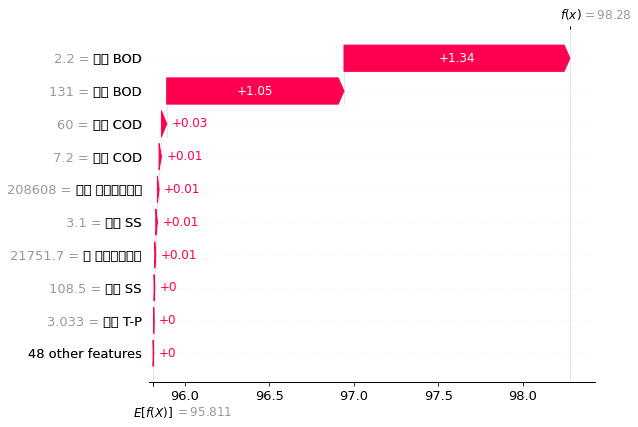

In [ ]:
import xgboost
import shap

# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, Y_train)


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])